In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_4140/1549549554.py:20: RuntimeWarning: overflow encountered in scalar multiply
  C_new[i] = C[i] + D * dt / dr**2 * (C[i+1] - 2 * C[i] + C[i-1]) + \
/tmp/ipykernel_4140/1549549554.py:21: RuntimeWarning: overflow encountered in scalar subtract
  D * dt / (r[i] * dr) * (C[i+1] - C[i])
/tmp/ipykernel_4140/1549549554.py:20: RuntimeWarning: overflow encountered in scalar subtract
  C_new[i] = C[i] + D * dt / dr**2 * (C[i+1] - 2 * C[i] + C[i-1]) + \
/tmp/ipykernel_4140/1549549554.py:20: RuntimeWarning: overflow encountered in scalar add
  C_new[i] = C[i] + D * dt / dr**2 * (C[i+1] - 2 * C[i] + C[i-1]) + \
/tmp/ipykernel_4140/1549549554.py:20: RuntimeWarning: invalid value encountered in scalar add
  C_new[i] = C[i] + D * dt / dr**2 * (C[i+1] - 2 * C[i] + C[i-1]) + \


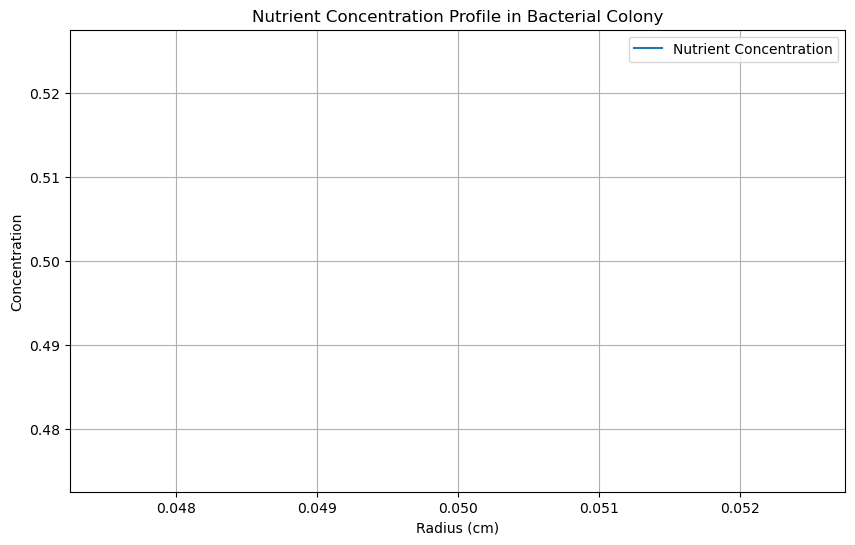

In [2]:
# Constants
D = 1e-6  # Diffusion coefficient in cm^2/s (example value)
C0 = 1.0  # Initial concentration in arbitrary units
Cs = 0.5  # Substrate concentration in arbitrary units
R0 = 0.02  # Initial radius of the colony in cm (400 um)
Rf = 0.05  # Final radius of the colony in cm (500 um)
T = 12 * 3600  # Total time in seconds (12 hours)
dt = 1  # Time step in seconds
dr = 0.001  # Radial step in cm

# Discretization
r = np.arange(0, Rf + dr, dr)
t = np.arange(0, T + dt, dt)
C = np.ones_like(r) * C0

# Numerical solution using finite difference method
for time in t:
    C_new = C.copy()
    for i in range(1, len(r) - 1):
        C_new[i] = C[i] + D * dt / dr**2 * (C[i+1] - 2 * C[i] + C[i-1]) + \
                   D * dt / (r[i] * dr) * (C[i+1] - C[i])
    C_new[-1] = Cs  # Boundary condition at the edge
    C_new[0] = C_new[1]  # Symmetry condition at the center
    C = C_new

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(r, C, label='Nutrient Concentration')
plt.xlabel('Radius (cm)')
plt.ylabel('Concentration')
plt.title('Nutrient Concentration Profile in Bacterial Colony')
plt.legend()
plt.grid(True)
plt.show()
